In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-book-datasets-10m/book300k-400k.csv
/kaggle/input/goodreads-book-datasets-10m/user_rating_6000_to_11000.csv
/kaggle/input/goodreads-book-datasets-10m/user_rating_3000_to_4000.csv
/kaggle/input/goodreads-book-datasets-10m/book1500k-1600k.csv
/kaggle/input/goodreads-book-datasets-10m/book3000k-4000k.csv
/kaggle/input/goodreads-book-datasets-10m/book200k-300k.csv
/kaggle/input/goodreads-book-datasets-10m/book1900k-2000k.csv
/kaggle/input/goodreads-book-datasets-10m/book800k-900k.csv
/kaggle/input/goodreads-book-datasets-10m/book1800k-1900k.csv
/kaggle/input/goodreads-book-datasets-10m/user_rating_4000_to_5000.csv
/kaggle/input/goodreads-book-datasets-10m/user_rating_0_to_1000.csv
/kaggle/input/goodreads-book-datasets-10m/book900k-1000k.csv
/kaggle/input/goodreads-book-datasets-10m/book700k-800k.csv
/kaggle/input/goodreads-book-datasets-10m/user_rating_5000_to_6000.csv
/kaggle/input/goodreads-book-datasets-10m/book600k-700k.csv
/kaggle/input/goodreads-book-datasets-

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/goodreads-book-datasets-10m/book1-100k.csv')
df.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [4]:
df.columns

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3'],
      dtype='object')

In [5]:
# Drop columns with too many missing or non-useful values
df = df.drop(columns=['Id', 'Name', 'RatingDist1', 'RatingDist2', 'RatingDist3',
                      'RatingDist4', 'RatingDist5', 'RatingDistTotal', 'ISBN'])

# Drop rows with missing values
df = df.dropna()

# Show updated info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20093 entries, 0 to 58281
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pagesNumber     20093 non-null  int64  
 1   PublishMonth    20093 non-null  int64  
 2   PublishDay      20093 non-null  int64  
 3   Publisher       20093 non-null  object 
 4   CountsOfReview  20093 non-null  int64  
 5   PublishYear     20093 non-null  int64  
 6   Language        20093 non-null  object 
 7   Authors         20093 non-null  object 
 8   Rating          20093 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.5+ MB


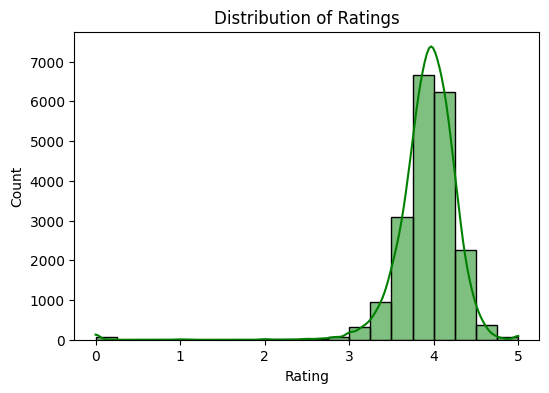

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Ratings')
plt.show()

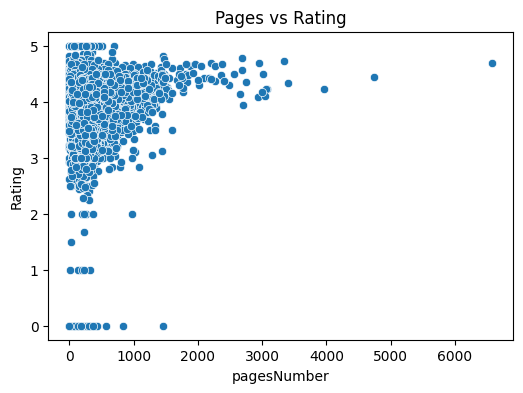

In [7]:
# Pages vs Rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pagesNumber', y='Rating', data=df)
plt.title('Pages vs Rating')
plt.show()

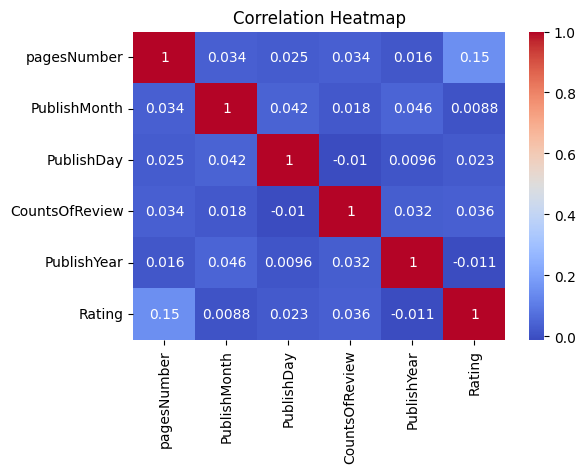

In [8]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Select features and target
X = df[['pagesNumber', 'CountsOfReview', 'PublishYear', 'PublishMonth', 'PublishDay']]
y = df['Rating']

In [10]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: -0.0013427471526172852
RMSE: 0.395127843653585


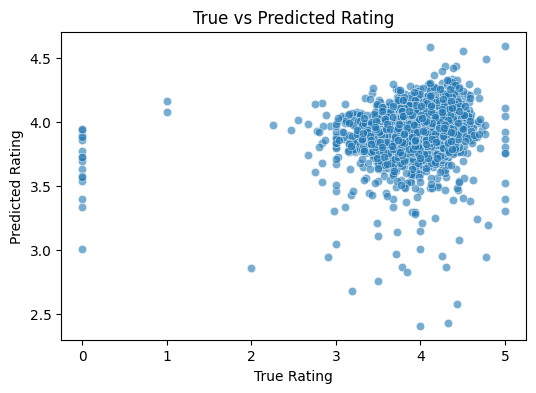

In [13]:
# True vs Predicted Ratings
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('True Rating')
plt.ylabel('Predicted Rating')
plt.title('True vs Predicted Rating')
plt.show()